## Name : G.SAI LALITHA SHALINI

## @Bharat Intern

## Domain: Machine Learning Intern

## Task-1 : House price prediction


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
%matplotlib inline 

### Data Collection and Visualizing the data

In [2]:
dt = pd.read_csv('Melbourne_housing_FULL.csv')

In [3]:
dt.head() 

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/9/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/2/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/2/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/3/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
dt.shape

(34857, 21)

In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [6]:
dt.drop_duplicates()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/9/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/2/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/2/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/3/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [7]:
dt.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [8]:
dt.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

<AxesSubplot:>

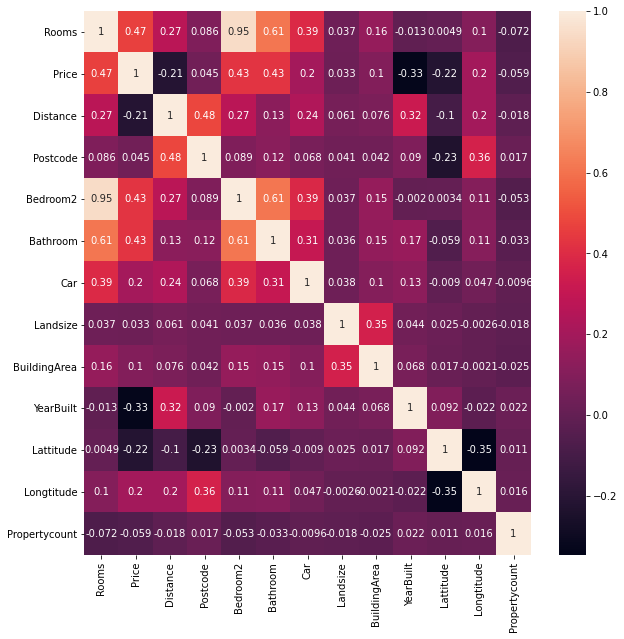

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(dt.corr(),annot = True)

In [ ]:
plt.figure(figsize=(4,4))
sns.pairplot(dt)

<Figure size 288x288 with 0 Axes>

In [ ]:
sns.distplot(dt['Price'])

### Distribution of Price

In [ ]:
# Distribution of price

dt['Price'].hist(bins=100)

# Set axis labels and plot title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')

# Show the plot
plt.show()

In [ ]:
# removing rows based on outliers

(dt['Price'] > 0.3e7).sum()
dt = dt[~(dt['Price'] > 0.3e7)]

In [ ]:
# Distribution of Price after removing outlier

dt['Price'].hist(bins=100)

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')

plt.show()

### Replacing Null values

In [ ]:
dt.isnull().sum()

In [ ]:
cols_to_fill_zero=['Propertycount','Distance','Bedroom2','Bathroom','Car']
dt[cols_to_fill_zero] = dt[cols_to_fill_zero].fillna(0)

In [ ]:
dt.isnull().sum()

In [ ]:
dt['BuildingArea']=dt['BuildingArea'].fillna(dt.BuildingArea.mean())

In [ ]:
dt.isnull().sum()

In [ ]:
dt['Landsize']=dt['Landsize'].fillna(dt.Landsize.mean())

In [ ]:
dt.isnull().sum()

In [ ]:
dt.dropna(inplace=True)

In [ ]:
dt.isna().sum()

In [ ]:
dt.nunique(axis = 0)

### Dropping Unwanted variables

In [ ]:
dt.info()

In [ ]:
data = dt.drop(['Address','Suburb','SellerG','Method','Regionname','Car','Propertycount',],axis = 1)
data

In [ ]:
data=pd.get_dummies(data,drop_first=True)
data

### Building the data

In [ ]:
#Splitting train-test sets

x = data.drop('Price', axis=1)
y = data['Price']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state =2)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr =LinearRegression().fit(X_train,Y_train)

In [ ]:
lr.score(X_test,Y_test)*100

In [ ]:
from sklearn import linear_model
lasso_reg=linear_model.Lasso(alpha=10)
lasso_reg.fit(X_test,Y_test)

In [ ]:
lasso_reg.score(X_test,Y_test)*100

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=10)
ridge_reg.fit(X_train,Y_train)

In [ ]:
ridge_reg.score(X_test,Y_test)*100

In [ ]:
#training data Prediction
prediction = lr.predict(X_train)
print("R2 Squared error of Training Data:",metrics.r2_score(Y_train,prediction)*100)

In [ ]:
#Visualization of predicted and actual training data
plt.scatter(Y_train,prediction, s = 15)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.title('Actual Data vs Predicted Data')
plt.show()

In [ ]:
#testing data Prediction
prediction1 = lr.predict(X_test)
print("R2 Squared error of Testing Data:",metrics.r2_score(Y_test,prediction1)*100)

In [ ]:
#Visualization of predicted and actual testing data
plt.scatter(Y_test,prediction1, s = 15)
plt.plot([min(Y_test),max(Y_test)],[min(prediction1),max(prediction1)])
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.title('Actual Data vs Predicted Data') 
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(Y_test, prediction1)) 
print('MSE:', metrics.mean_squared_error(Y_test, prediction1)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, prediction1))) 